In [1]:
#Langkah 1
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Langkah 2
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
# Membaca data Posisi_gaji.csv yang telah disimpan dalam folder yang sama dan mengambil variabel x sebagai independen dan y sebagai dependen
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

In [4]:
# Langkah 3
# Feature Scaling
# Melakukan penskalaan fitur X dan target y menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler

# Menginisialisi objek untuk x dan y
sc_X = StandardScaler()
sc_y = StandardScaler()

#Melakukan penskalaan data x dan y, hasil akhirnya akan dinormalisasikan ke bentuk yang beragam
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

In [5]:
# Langkah 4
# Fitting SVR ke dataset
from sklearn.svm import SVR

# Melakukan inisialisasi model SVR menggunakan kenel RBF untuk mengukur jarak antara titik data
regressor = SVR(kernel='rbf')

# Melatih data x dan y yang sebelumnya telah dinormalisasi
regressor.fit(X, y)

c:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

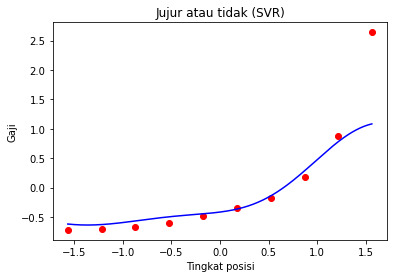

In [6]:
# Langkah 5
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
# Membuat X_grid untuk visualisasi
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)

# Membuat Scatter plot data asli
plt.scatter(X, y, color='red')

# Membuat Garis plot hasil prediksi
plt.plot(X_grid, regressor.predict(X_grid), color='blue')

# Menambahkan Judul
plt.title('Jujur atau tidak (SVR)')

# Menambahkan label sumbu
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

In [8]:
# Langkah 6
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

In [10]:
#Langkah 7
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [0.01150915]


In [11]:
# Langkah 9
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Menginisalisasi variabel y_actual dan y_pred
y_actual = y 
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

# Mencetak hasil matriks
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22322362280774546
MSE: 0.24861632111450263
RMSE: 0.49861440123055273
R-squared: 0.7513836788854974
